<a href="https://colab.research.google.com/github/BrightonMboya/Deep_Learning-with-TensorFlow/blob/CNNs/Convolutional_Neural_Networks_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What we're going to cover
<br>
Specifically, we're going to go through the follow with TensorFlow:

<br>
Getting a dataset to work with
<br>
Architecture of a convolutional neural network
<br>
A quick end-to-end example (what we're working towards)
<br>
Steps in modelling for binary image classification with CNNs
<br>
Becoming one with the data
<br>
Preparing data for modelling
<br>
Creating a CNN model (starting with a baseline)
<br>
Fitting a model (getting it to find patterns in our data)
<br>
Evaluating a model
<br>
Improving a model
<br>
Making a prediction with a trained model
<br>
Steps in modelling for multi-class image classification with CNNs
<br>
Same as above (but this time with a different dataset)

## Get the data
Because convolutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

The images we're going to work with are from the Food-101 dataset, a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

🔑 Note: To prepare the data we're using, preprocessing steps such as, moving the images into different subset folders, have been done. To see these preprocessing steps check out the preprocessing notebook.

In [3]:
import zipfile 

#get the data from the web
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref= zipfile.ZipFile('pizza_steak.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2021-08-10 10:19:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 172.253.117.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   193MB/s    in 0.5s    

2021-08-10 10:19:26 (193 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data (become one with it)
A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you're working with.

Wtih this being said, let's inspect the data we just downloaded.

The file structure has been formatted to be in a typical format you might use for working with images.

More specifically:

A `train` directory which contains all of the images in the training dataset with subdirectories each named after a certain class containing images of that class.
A `test` directory with the same structure as the train directory.

In [4]:
# lets inspect the data which we imported
!ls pizza_steak

test  train


we can see we have `test` and `train` folder
<br>
let's see what we have inside them

In [5]:
! ls pizza_steak/train


pizza  steak


In [6]:
#what about the steak directory
! ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [7]:
# what about the test folder
! ls pizza_steak/test/

pizza  steak


In [8]:
! ls pizza_steak/test/steak/

100274.jpg   1653815.jpg  2307638.jpg  2944161.jpg  3622237.jpg  638678.jpg
1012080.jpg  1655387.jpg  2308682.jpg  2945937.jpg  365725.jpg	 640024.jpg
1016217.jpg  1662212.jpg  2315011.jpg  296375.jpg   3662612.jpg  647683.jpg
1064847.jpg  168551.jpg   2339231.jpg  2981911.jpg  367422.jpg	 653303.jpg
1082384.jpg  1687010.jpg  2353677.jpg  2984679.jpg  3681340.jpg  66183.jpg
108310.jpg   1718949.jpg  2365038.jpg  2989645.jpg  3753767.jpg  66207.jpg
1094883.jpg  1778186.jpg  2372048.jpg  3013185.jpg  3757027.jpg  66858.jpg
1107549.jpg  1792128.jpg  2382600.jpg  3013404.jpg  378397.jpg	 670345.jpg
1118585.jpg  1794566.jpg  2416973.jpg  3029602.jpg  3786535.jpg  673127.jpg
1163050.jpg  1848046.jpg  2475366.jpg  3048920.jpg  3835895.jpg  690177.jpg
1166047.jpg  1848936.jpg  2484823.jpg  3060047.jpg  3842125.jpg  690477.jpg
1190808.jpg  1868005.jpg  2510026.jpg  3062369.jpg  3873283.jpg  697562.jpg
1194662.jpg  1872368.jpg  2512387.jpg  3063435.jpg  3873655.jpg  7056.jpg
1206166.jpg  1874088

In [9]:
import os
# walkthrough the dataset and list the number of files

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [10]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir= pathlib.Path('pizza_steak/train/') # turns our training path into a python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['.DS_Store' 'pizza' 'steak']


Okay, so we've got a collection of 750 training images and 250 testing images of pizza and steak.

Let's look at some.

🤔 Note: Whenever you're working with data, it's always good to visualize it as much as possible. Treat your first couple of steps of a project as becoming one with the data. Visualize, visualize, visualize.

In [11]:
# view an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  #set up all the images in this directrory
  target_folder= target_dir + target_class

  # get a random img path
  """the below code returns a particular length list of items chosen from the 
  sequence i.e. list, tuple, string or set. Used for random sampling without 
  replacement."""
  random_image= random.sample(os.listdir(target_folder), 1)

  #read the image
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title('target_class')
  plt.axis('off');

  print(f"Image Shape: {img.shape}")
  #if you uncomment the line below it will return a tensor of the img
  return img

Image Shape: (499, 512, 3)


array([[[0, 3, 3],
        [0, 2, 3],
        [0, 1, 3],
        ...,
        [0, 0, 0],
        [0, 0, 2],
        [0, 1, 4]],

       [[0, 3, 1],
        [0, 2, 3],
        [0, 1, 3],
        ...,
        [0, 0, 0],
        [0, 0, 2],
        [0, 1, 4]],

       [[0, 3, 1],
        [0, 2, 1],
        [0, 1, 3],
        ...,
        [0, 0, 0],
        [0, 0, 2],
        [0, 1, 4]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

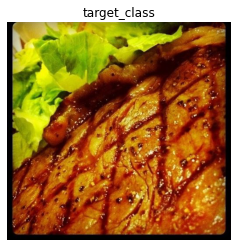

In [12]:
view_random_image(target_dir='pizza_steak/train/',
                  target_class= 'steak')

After going through a dozen or so images from the different classes, you can start to get an idea of what we're working with.

The entire Food101 dataset comprises of similar images from 101 different classes.

You might've noticed we've been printing the image shape alongside the plotted image.

This is because the way our computer sees the image is in the form of a big array (tensor).

Looking at the image shape more closely, you'll see it's in the form (Width, Height, Colour Channels).

In our case, the width and height vary but because we're dealing with colour images, the colour channels value is always 3. This is for different values of red, green and blue (RGB) pixels.

You'll notice all of the values in the img array are between 0 and 255. This is because that's the possible range for red, green and blue values.

For example, a pixel with a value red=0, green=0, blue=255 will look very blue.

So when we build a model to differentiate between our images of pizza and steak, it will be finding patterns in these different pixel values which determine what each class looks like.

🔑 Note: As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255.

## A (typical) architecture of a convolutional neural network
Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways. What you see below are some components you'd expect to find in a traditional CNN.

Components of a convolutional neural network:

In [13]:
# don't freak out it's just creating a pandas data frame lol

data= {'Hyperparameter/ layer type': ['Input image(s)', 'Input_layer', 'convolution_layer', 'Hidden activation', 'pooling layer', 'fully connected layer',
                                      'output layer', 'output activation' ],
       'what does it do': ["Target images you'd like to discover patterns in", "Takes in target images and preprocesses them for further layers",
                           "Extracts/learns the most important features from target images", "Adds non-linearity to learned features (non-straight lines)",
                           "Reduces the dimensionality of learned image features", "Further refines learned features from convolution layers",
                           "Takes learned features and outputs them in shape of target labels", "Adds non-linearities to output layer"],
       'Typical values': ["Whatever you can take a photo (or video) of", "input_shape = [batch_size, image_height, image_width, color_channels]",
                          "Multiple, can create with tf.keras.layers.ConvXD (X can be multiple values)", "Usually ReLU (tf.keras.activations.relu)",
                          "Average (tf.keras.layers.AvgPool2D) or Max (tf.keras.layers.MaxPool2D)", 
                          "tf.keras.layers.Dense", "output_shape = [number_of_classes] (e.g. 3 for pizza, steak or sushi)",
                          "tf.keras.activations.sigmoid (binary classification) or tf.keras.activations.softmax"]}

import pandas as pd
df = pd.DataFrame(data= data)
df

,Hyperparameter/ layer type,what does it do,Typical values
0,Input image(s),Target images you'd like to discover patterns in,Whatever you can take a photo (or video) of
1,Input_layer,Takes in target images and preprocesses them f...,"input_shape = [batch_size, image_height, image..."
2,convolution_layer,Extracts/learns the most important features fr...,"Multiple, can create with tf.keras.layers.Conv..."
3,Hidden activation,Adds non-linearity to learned features (non-st...,Usually ReLU (tf.keras.activations.relu)
4,pooling layer,Reduces the dimensionality of learned image fe...,Average (tf.keras.layers.AvgPool2D) or Max (tf...
5,fully connected layer,Further refines learned features from convolut...,tf.keras.layers.Dense
6,output layer,Takes learned features and outputs them in sha...,output_shape = [number_of_classes] (e.g. 3 for...
7,output activation,Adds non-linearities to output layer,tf.keras.activations.sigmoid (binary classific...


In [14]:
# let's render the above table using a google colab api
from google.colab import data_table
data_table.DataTable(df, include_index= False)

,Hyperparameter/ layer type,what does it do,Typical values
0,Input image(s),Target images you'd like to discover patterns in,Whatever you can take a photo (or video) of
1,Input_layer,Takes in target images and preprocesses them f...,"input_shape = [batch_size, image_height, image..."
2,convolution_layer,Extracts/learns the most important features fr...,"Multiple, can create with tf.keras.layers.Conv..."
3,Hidden activation,Adds non-linearity to learned features (non-st...,Usually ReLU (tf.keras.activations.relu)
4,pooling layer,Reduces the dimensionality of learned image fe...,Average (tf.keras.layers.AvgPool2D) or Max (tf...
5,fully connected layer,Further refines learned features from convolut...,tf.keras.layers.Dense
6,output layer,Takes learned features and outputs them in sha...,output_shape = [number_of_classes] (e.g. 3 for...
7,output activation,Adds non-linearities to output layer,tf.keras.activations.sigmoid (binary classific...


## An end-to-end example
We've checked out our data and found there's 750 training images, as well as 250 test images per class and they're all of various different shapes.

It's time to jump straight in the deep end.

Reading the original dataset authors paper, we see they used a Random Forest machine learning model and averaged 50.76% accuracy at predicting what different foods different images had in them.

From now on, that 50.76% will be our baseline.

🔑 Note: A baseline is a score or evaluation metric you want to try and beat. Usually you'll start with a simple model, create a baseline and try to beat it by increasing the complexity of the model. A really fun way to learn machine learning is to find some kind of modelling paper with a published result and try to beat it.

The code in the following cell replicates and end-to-end way to model our pizza_steak dataset with a convolutional neural network (CNN) using the components listed above.

There will be a bunch of things you might not recognize but step through the code yourself and see if you can figure out what it's doing.

We'll go through each of the steps later on in the notebook.

For reference, the model we're using replicates TinyVGG, the computer vision architecture which fuels the CNN explainer webpage.

📖 Resource: The architecture we're using below is a scaled-down version of VGG-16, a convolutional neural network which came 2nd in the 2014 ImageNet classification competition.

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen= ImageDataGenerator(rescale= 1./255)
valid_datagen = ImageDataGenerator(rescale= 1./255)

# setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# import data from directories and turn it into bathches
train_data= train_datagen.flow_from_directory(train_dir,
                                             batch_size= 32, #number of images to process at a time
                                             target_size= (224, 224), #convert all the images to a 224 by 224 pixels
                                             class_mode= 'binary', # kind of problems we're working on
                                             seed= 42)

valid_data= valid_datagen.flow_from_directory(test_dir,
                                              batch_size= 32,
                                              target_size= (224, 224),
                                              class_mode= 'binary',
                                              seed= 42)
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1= tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters= 10,
                               kernel_size= 3, # can also be (3,3)
                               activation= 'relu',
                               input_shape= (224, 224, 3)), # first layer specifies input shape (height, width, colour chanells)
         tf.keras.layers.Conv2D(10, 3, activation= "relu"),
         tf.keras.layers.MaxPool2D(pool_size= 2, #pool_size can also be (2,2))
                                   padding= 'Valid'),
         tf.keras.layers.Conv2D(10, 3, activation= 'relu'),
         tf.keras.layers.MaxPool2D(2),
         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(1, activation= 'sigmoid')
        ])

#compile the model
model_1.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])
#fit the model
history_1= model_1.fit(train_data,
                       epochs= 5,
                       steps_per_epoch= len(train_data),
                       validation_data= valid_data,
                       validation_steps= len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 41s 205ms/step - loss: 0.5605 - accuracy: 0.7073 - val_loss: 0.4584 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 9s 199ms/step - loss: 0.4700 - accuracy: 0.7793 - val_loss: 0.4013 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 9s 201ms/step - loss: 0.4465 - accuracy: 0.7940 - val_loss: 0.5389 - val_accuracy: 0.7120
Epoch 4/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4125 - accuracy: 0.8273 - val_loss: 0.3405 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3394 - accuracy: 0.8533 - val_loss: 0.3282 - val_accuracy: 0.8600


🤔 Note: If the cell above takes more than ~12 seconds per epoch to run, you might not be using a GPU accelerator. If you're using a Colab notebook, you can access a GPU accelerator by going to Runtime -> Change Runtime Type -> Hardware Accelerator and select "GPU". After doing so, you might have to rerun all of the above cells as changing the runtime type causes Colab to have to reset.

Nice! After 5 epochs, our model beat the baseline score of 50.76% accuracy (our model got ~85% accuaracy on the training set and ~85% accuracy on the test set).

However, our model only went through a binary classificaiton problem rather than all of the 101 classes in the Food101 dataset, so we can't directly compare these metrics. That being said, the results so far show that our model is learning something.

🛠 Practice: Step through each of the main blocks of code in the cell above, what do you think each is doing? It's okay if you're not sure, we'll go through this soon. In the meantime, spend 10-minutes playing around the incredible CNN explainer website. What do you notice about the layer names at the top of the webpage? https://poloclub.github.io/cnn-explainer/

Since we've already fit a model, let's check out its architecture.

In [16]:
# check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 29160)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2

Now there are a few new things here we haven't discussed, namely:

The ImageDataGenerator class and the rescale parameter
* `The flow_from_directory()` method
  * The `batch_size` parameter
  * The `target_size` parameter
* `Conv2D` layers (and the parameters which come with them)
* `MaxPool2D` layers (and their parameters).
* The `steps_per_epoch` and `validation_steps` parameters in the `fit()` function
<br>
Before we dive into each of these, let's see what happens if we try to fit a model we've worked with previously to our data.

Using the same model as before
To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.

🔑 Note: If you haven't gone through the previous classification notebook, no troubles, we'll be bringing in the a simple 4 layer architecture used to separate dots replicated from the TensorFlow Playground environment.

We can use all of the same parameters in our previous model except for changing two things:

The data - we're now working with images instead of dots.
The input shape - we have to tell our neural network the shape of the images we're working with.
A common practice is to reshape images all to one size. In our case, we'll resize the images to (224, 224, 3), meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.

In [19]:
# set the random seed
tf.random.set_seed(42)

model_2= tf.keras.models.Sequential([
           tf.keras.layers.Flatten(input_shape= (224,224, 3)),
           tf.keras.layers.Dense(4, activation= 'relu'),
           tf.keras.layers.Dense(4, activation= 'relu'),
           tf.keras.layers.Dense(1, activation= 'sigmoid')
])

# compile the model
model_2.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

history_2= model_2.fit(train_data,
                       epochs= 5,
                       steps_per_epoch= len(train_data),
                       validation_data= valid_data,
                       validation_steps= len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 179ms/step - loss: 1.1615 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


Wow. One of the most noticeable things here is the much larger number of parameters in model_2 versus model_1.

model_2 has 602,141 trainable parameters where as model_1 has only 31,101. And despite this difference, model_1 still far and large out performs model_2.

🔑 Note: You can think of trainable parameters as patterns a model can learn from data. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, a convolutional neural network seeks to sort out and learn the most important patterns in an image. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different features in an image.

Since our previous model didn't work, do you have any ideas of how we might make it work?

How about we increase the number of layers?

And maybe even increase the number of neurons in each layer?

More specifically, we'll increase the number of neurons (also called hidden units) in each dense layer from 4 to 100 and add an extra layer.

🔑 Note: Adding extra layers or increasing the number of neurons in each layer is often referred to as increasing the complexity of your model.

In [20]:
# set the random seed
tf.random.set_seed(42)

#create the same model as above but this time arround increase the number of neurons in each layer
model_3= tf.keras.models.Sequential([
          tf.keras.layers.Flatten(input_shape= (224,224, 3)),
          tf.keras.layers.Dense(100, activation= 'relu'),
          tf.keras.layers.Dense(100, activation= 'relu'),
          tf.keras.layers.Dense(100, activation= 'relu'),  #add an additional layer
          tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs= 5,
                        validation_data= valid_data,
                        steps_per_epoch= len(train_data),
                        validation_steps= len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 184ms/step - loss: 3.2247 - accuracy: 0.6260 - val_loss: 1.4186 - val_accuracy: 0.5640
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 1.0667 - accuracy: 0.6920 - val_loss: 0.6821 - val_accuracy: 0.6880
Epoch 3/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6437 - accuracy: 0.7267 - val_loss: 0.8630 - val_accuracy: 0.6960
Epoch 4/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6164 - accuracy: 0.7720 - val_loss: 0.7604 - val_accuracy: 0.7340
Epoch 5/5
47/47 [==============================] - 9s 182ms/step - loss: 0.5324 - accuracy: 0.7793 - val_loss: 1.1479 - val_accuracy: 0.5580


Woah! Looks like our model is learning again. It got ~70% accuracy on the training set and ~70% accuracy on the validation set.

How does the architecute look?

In [22]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


My gosh, the number of trainable parameters has increased even more than model_2. And even with close to 500x (~15,000,000 vs. ~31,000) more trainable parameters, model_3 still doesn't out perform model_1.

This goes to show the power of convolutional neural networks and their ability to learn patterns despite using less parameters.

## End of Part 1 of Convolutional Neural Networks